In [1]:
%run common-imports.ipynb

#  Dataset-4


## Prerequisites

prior notebooks:

* Notebook 1: `univariate-1.ipynb`
* Notebook 2: `dataset-2.ipynb`
* Notebook 3: `dataset-3.ipynb`
* Notebook 4: `univariate-2.ipynb`
* Notebook 5: `univariate-3.ipynb`


## Lab Goals

* will explore this data, observe its statistical characteristics, visualize it.
* Next, we will take a systematic approach to build  linear and polynomial regression models to make prediction on the data. 

## Outcome

This lab should have given you some more fluency in dealing with polynomial regression, and under its limitations when dealing with data more appropriately modeled with transcendental functions.

In [2]:
#source = 'https://raw.githubusercontent.com/'
data = pd.read_csv("../datasets/dataset-4.csv")

In [3]:
data.sample(5)

,x,y
62,-4.405331,41.710608
40,-9.303292,135.382126
95,0.568865,-5.558952
18,-1.059046,5.130926
97,-5.119469,48.733724


#### Descriptive statistics


In [4]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
x,99.0,0.025950,5.795069,-9.792249,-4.489466,-0.653896,5.263204,9.953913
y,99.0,43.817392,38.695960,-5.558952,14.393938,32.658142,66.336876,151.376254


#### Missing Values Analysis


In [5]:
data.isnull().sum()

x    0
y    0
dtype: int64

 From the above results, it appears that there are no missing values at all. Therefore, we don't need to worry about addressing this issue.

#### Pandas Profiling



In [6]:
# data.profile_report()

## Data Visualization

### Plotting using matplotlib

Observe that the data distinctly exhibits nonlinearity of relationship between $x$ and $y$. **what the correlation is between the variables?** 


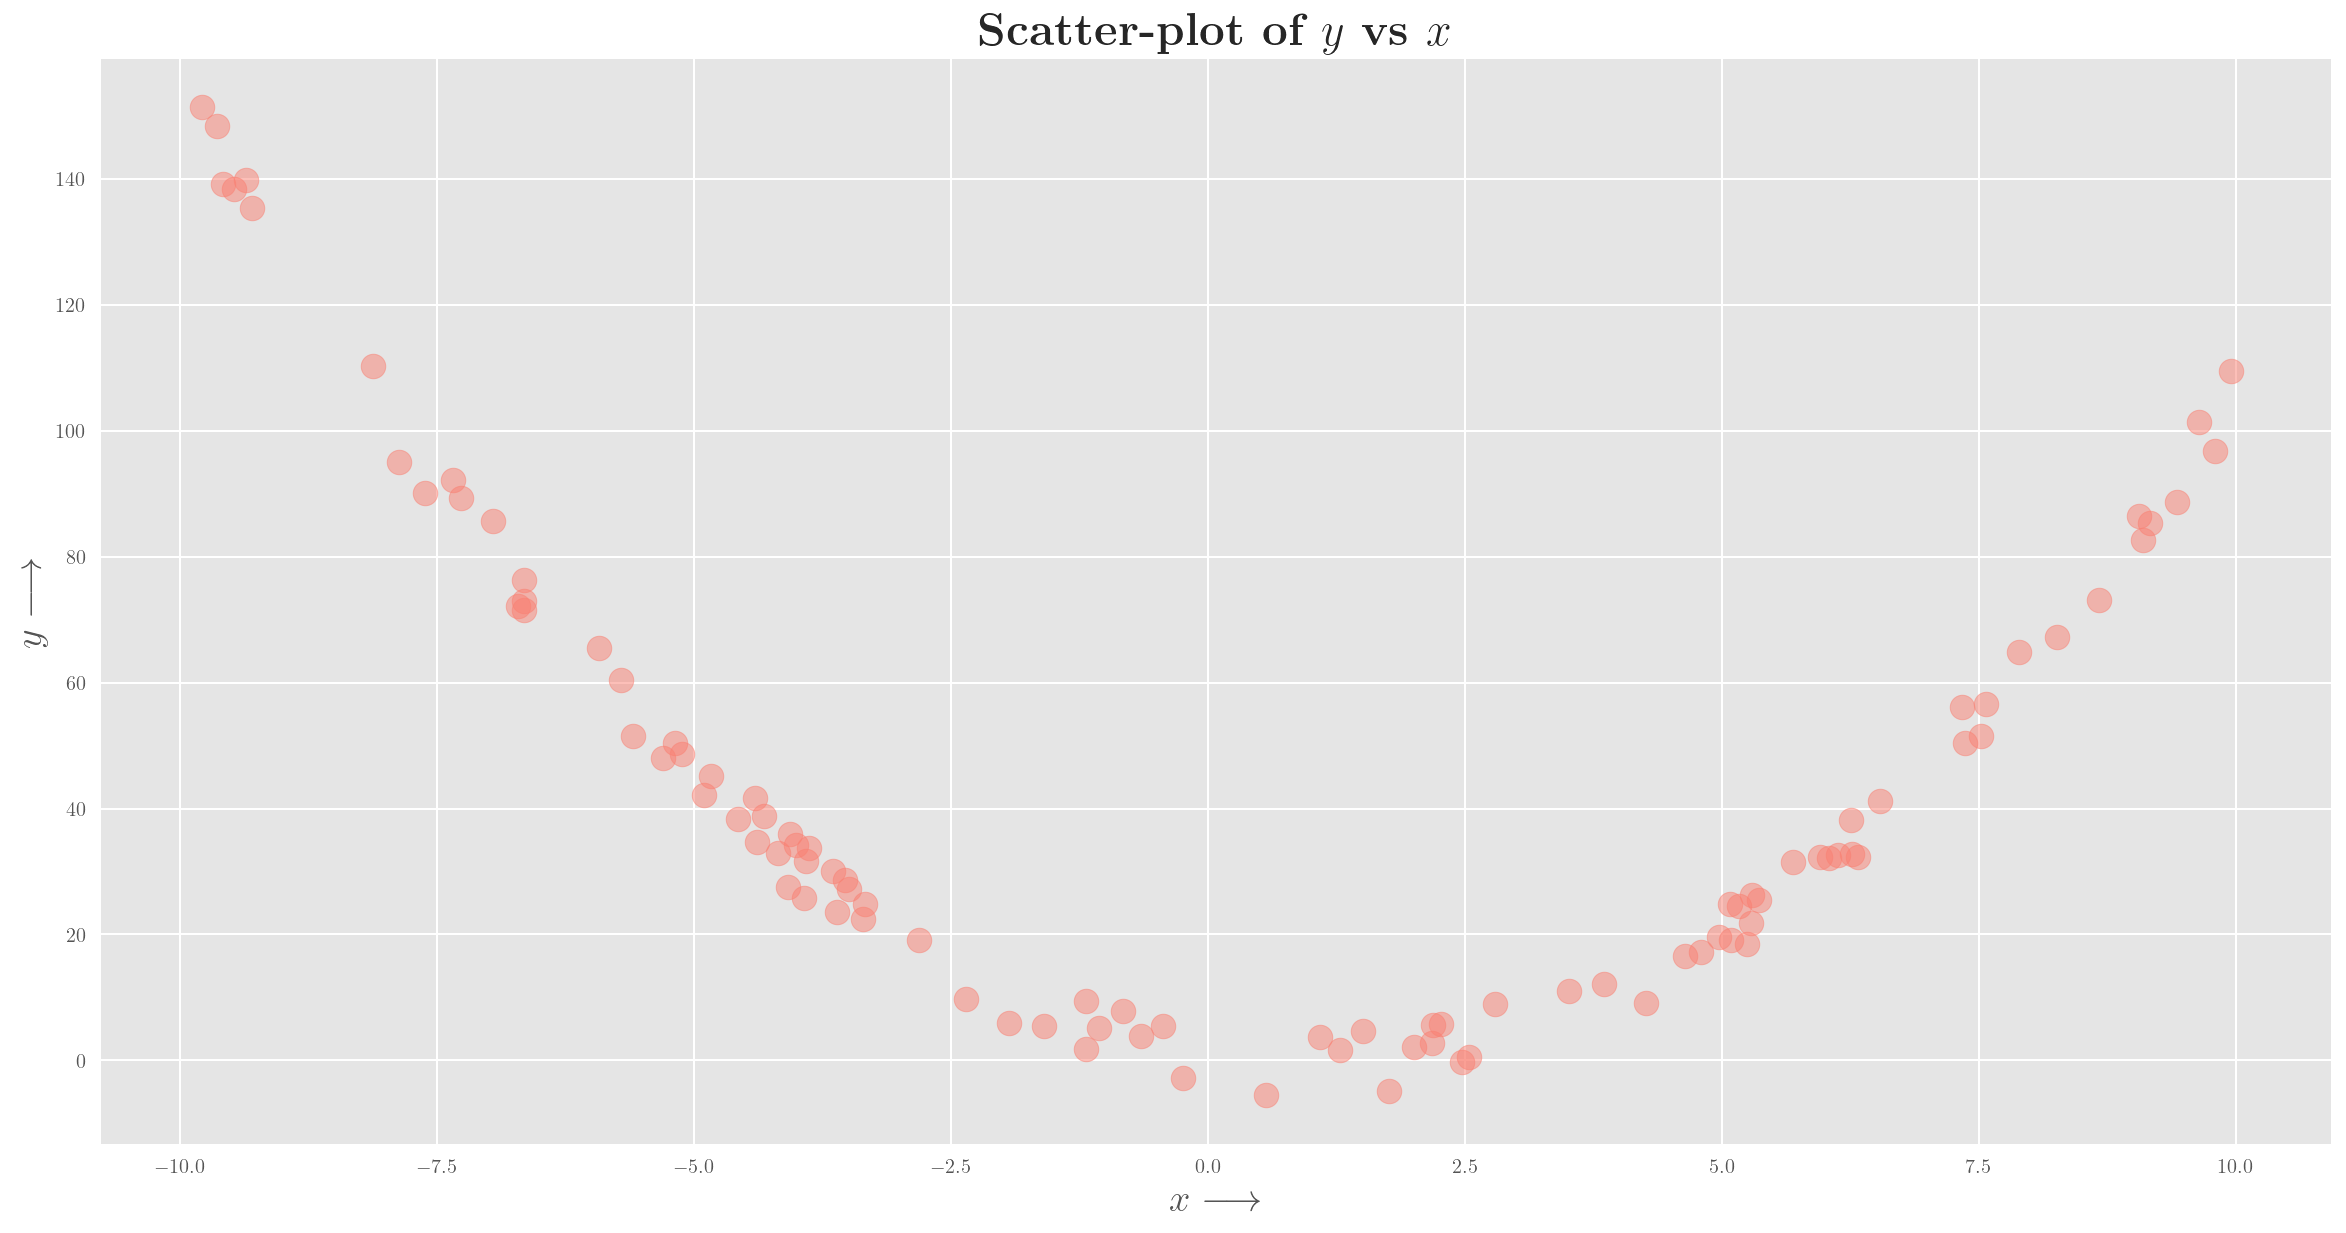

In [7]:
plt.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
plt.title(r'\textbf{Scatter-plot of $y$ vs $x$}')
plt.xlabel(r'$x\longrightarrow$');
plt.ylabel(r'$y\longrightarrow$');

# Regression

From the figure above, it should be apparent that a simple linear regression model is unlikely to work. However, let us first build a simple linear regression model for this dataset, in order to get a baseline performance.

As usual, we will first separate out the predictor from the target, and then split the data into a training and test set.

In [8]:
X, y = data[['x']], data['y']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size=0.5)

## Build a linear regression model

Let's build a regression model, and fit it to the dataset. For this, we instantiate a `LinearRegression` object named `model` using the constructor. Then we fit the `model` to the available training dataset.

In [10]:
model = LinearRegression();
model.fit(X_train, y_train);

Recall that a linear regression model is given by the equation:

\begin{equation} y =  \beta_0 + \beta_1 x + \epsilon\end{equation}

where:
$\epsilon$ is the irreducible error term, so that the model is essentially:

\begin{equation} \hat{y} =  \beta_0 + \beta_1 x \end{equation}

What values of $\beta_0$ (the intercept) and $\beta_1$ (the slope) is this model predicting? We can inspect this as follows:

In [11]:
print (f'Intercept: {model.intercept_}, Slope: {model.coef_}')

Intercept: 40.857817915455506, Slope: [-2.24854015]


Look back at the data visualization, and see if this agrees with your own estimates.

## Predictions from the model

Now, let's use the model to make predictions on the **test** data, something the model has not seen so far. By comparing the predictions to the actual values, we will get a sense of how well the model has learned to generalize from the data. 


In [12]:
yhat = model.predict(X_test)
print("Mean Squared Error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

Mean Squared Error: 1456.24
Coefficient of Determination (R^2):0.0491860854062125


The coefficient of determination, $R^2$ indicates a dismal model! Should we plod on to the next step of model verification: namely the residual analysis.

## Residual Analysis

will start by plotting the residuals from the predictions. Recall that the residual from the prediction $\hat{y}_i$ on a particular datum $(x_i, y_i)$ is defined as: 

\begin{equation}\mathbf{ r_i = \hat{y}_i  - y_i }\end{equation}

will use the `yellowbrick` library for looking at the model characteristics.

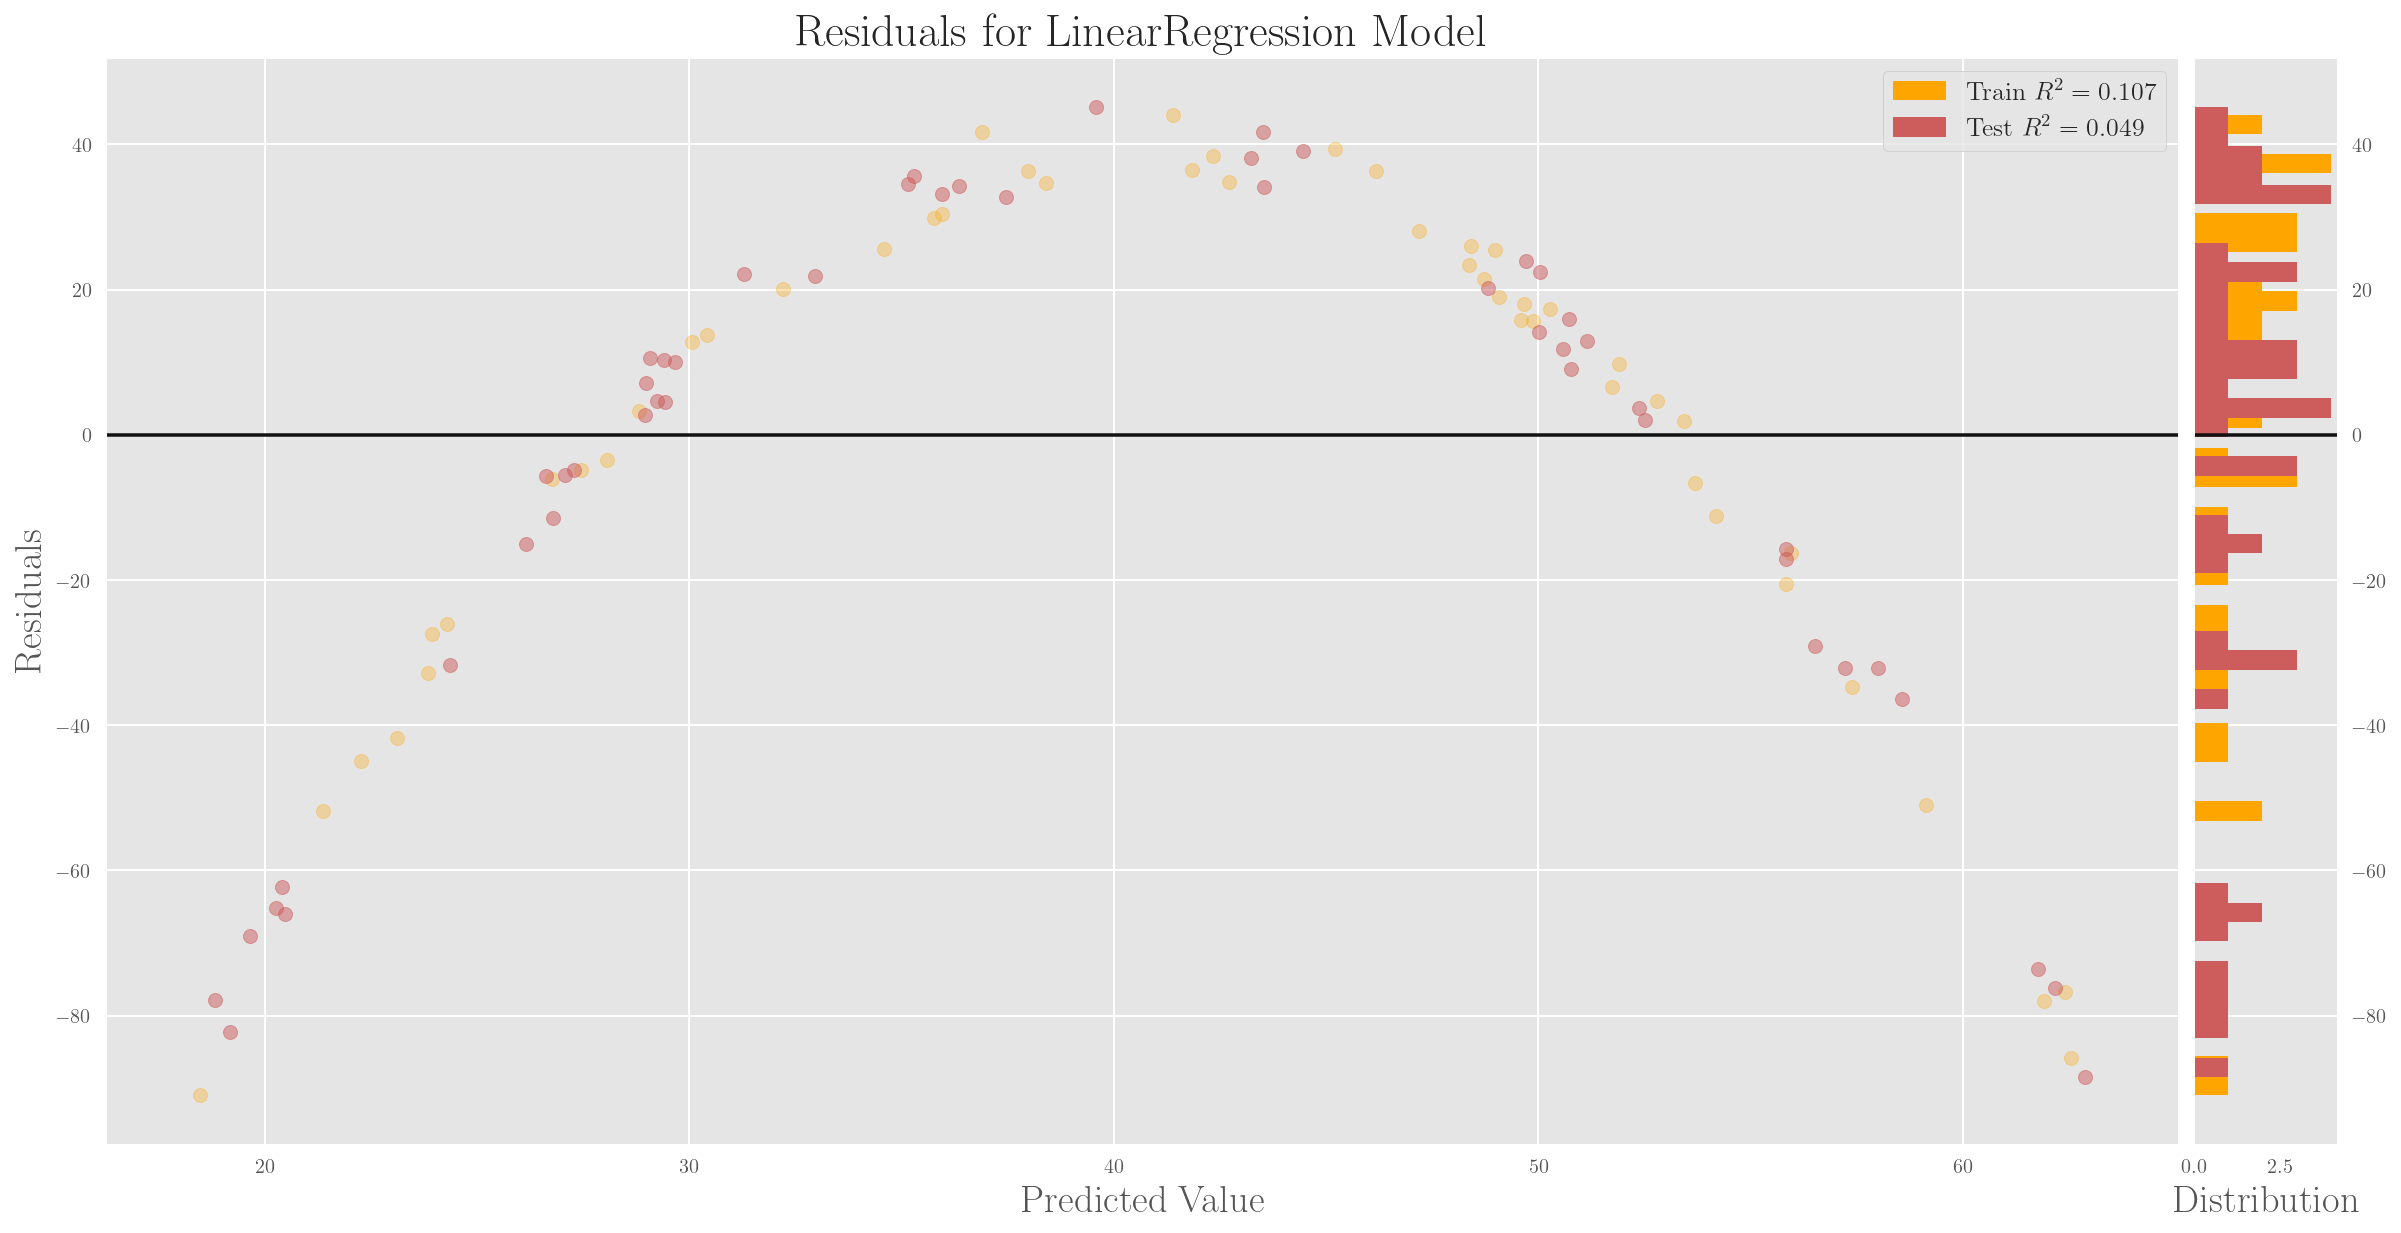

In [13]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_train, y_train, X_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

The residuals display a striking pattern! The presence of a pattern in the residuals in a clear indication that the model has failed to capture some essential characteristics of the relationship between $x$ and $y$.

## Visualization of the model predictions

As a final step, let us visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

In [14]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(X)

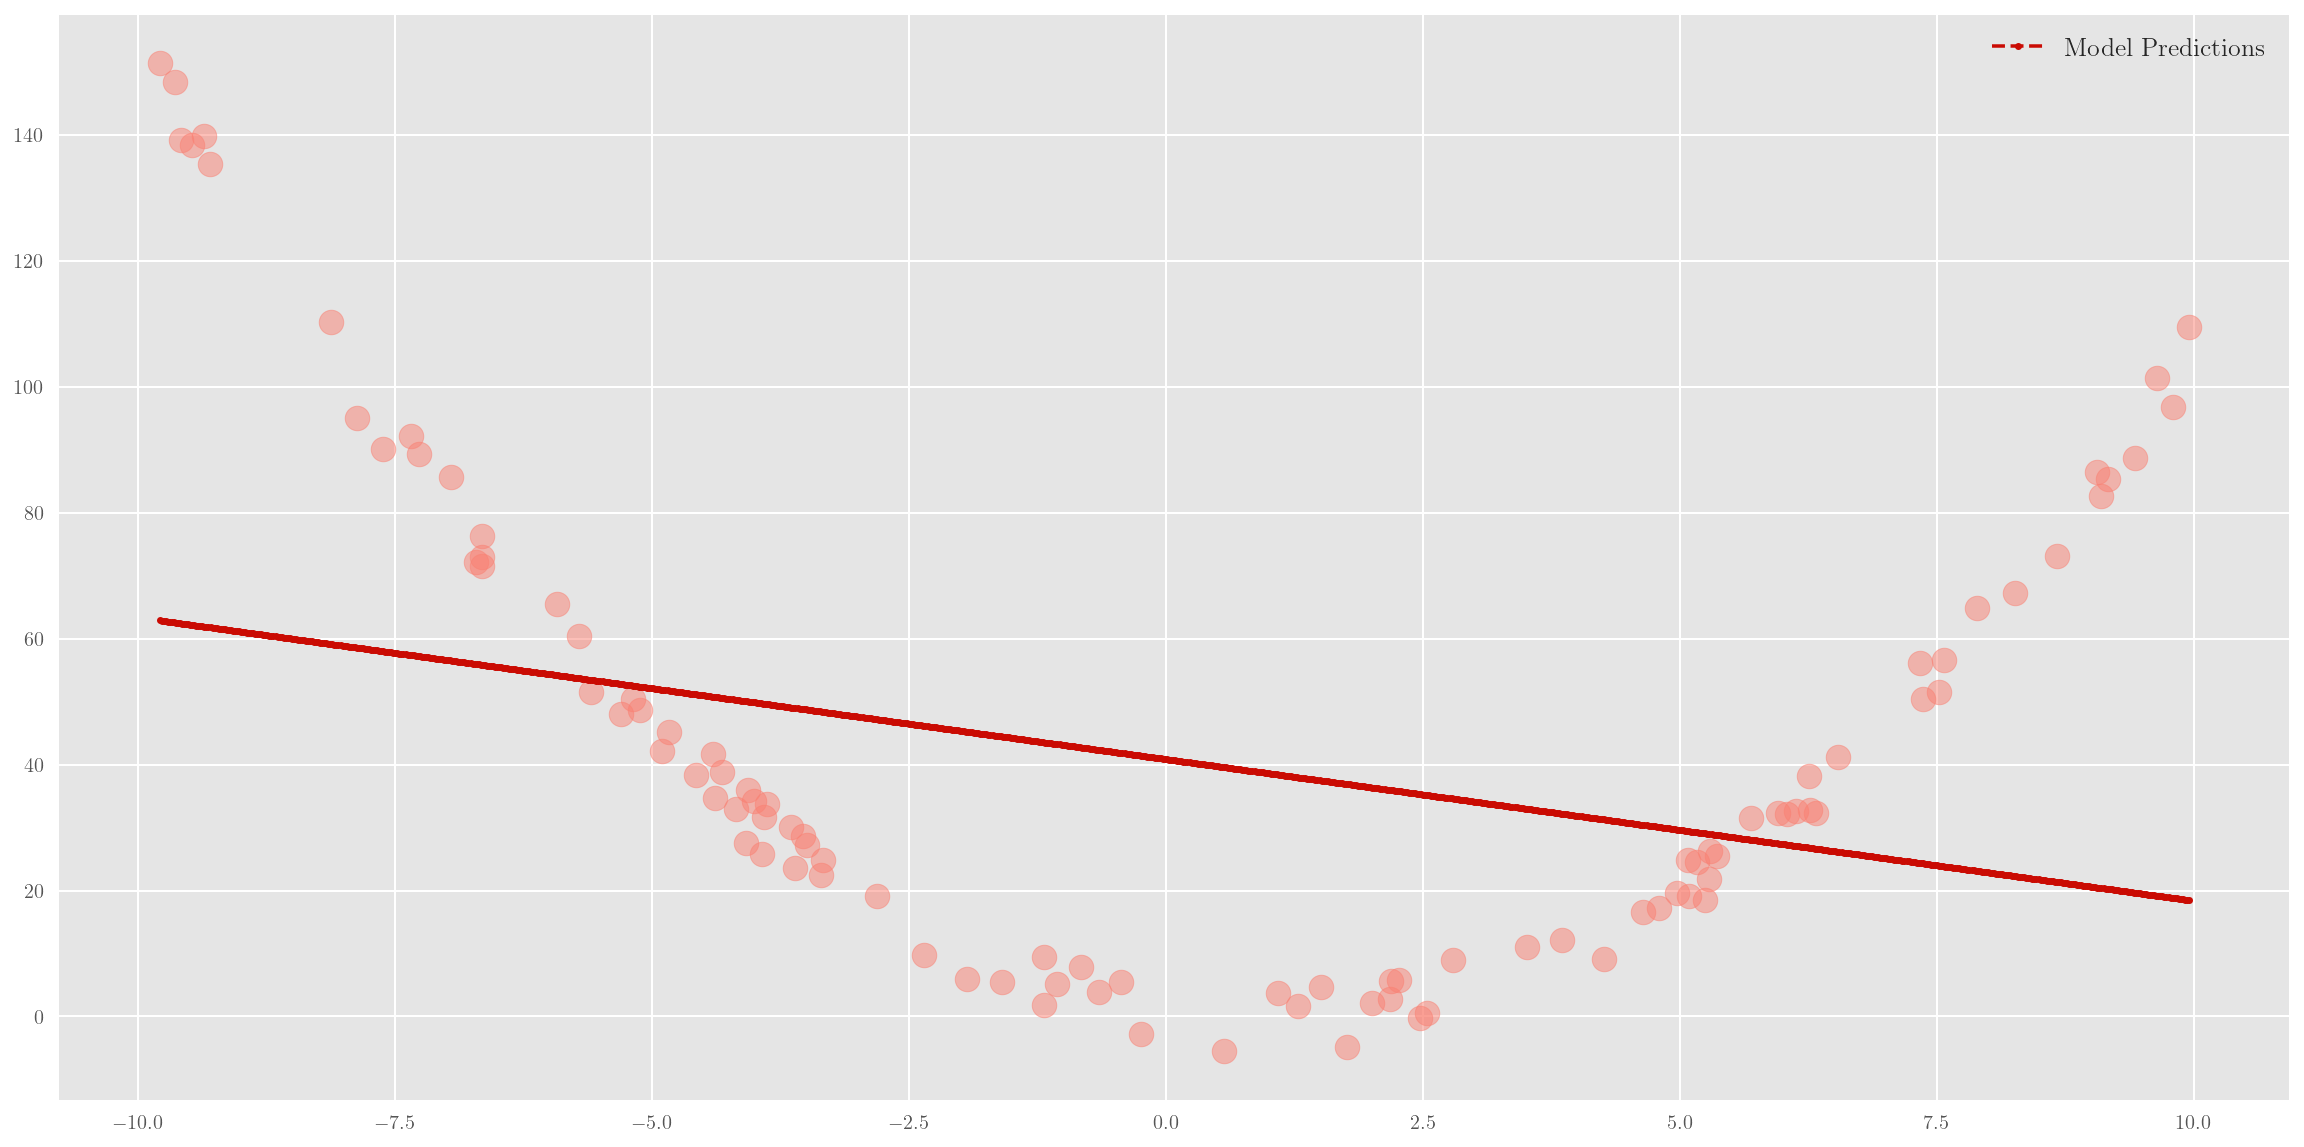

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

This simple linear model has, as one would have expected by now, failed terribly!

##### Polynomial Regression

Let's add polynomial features to the dataset, and then performing the regression can be an effective tool. 

merged the steps of:
* create polynomial degrees of the input
* fit a linear model to the data
* make predictions on test data
* print model diagnostics

In [16]:
degree     = 2
polynomial = PolynomialFeatures(degree)
X_poly = polynomial.fit_transform(X_train)
model = LinearRegression()
# Now, train the model
model.fit(X_poly, y_train)
print ("The cofficients: {}".format(model.coef_))
X_poly_test = polynomial.fit_transform(X_test)
yhat = model.predict(X_poly_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

The cofficients: [ 0.         -2.52019403  1.29303536]
Mean squared error: 10.86
Coefficient of Determination (R^2):0.9929123351880997


The coefficient of determination seems quite encouraging. Let us now proceed to the residual analysis.

## Residual Analysis

will start by plotting the residuals from the predictions. Recall that the residual from the prediction $\hat{y}_i$ on a particular datum $(x_i, y_i)$ is defined as: 

\begin{equation}\mathbf{ r_i = \hat{y}_i  - y_i }\end{equation}

We will use the `yellowbrick` library for looking at the model characteristics.

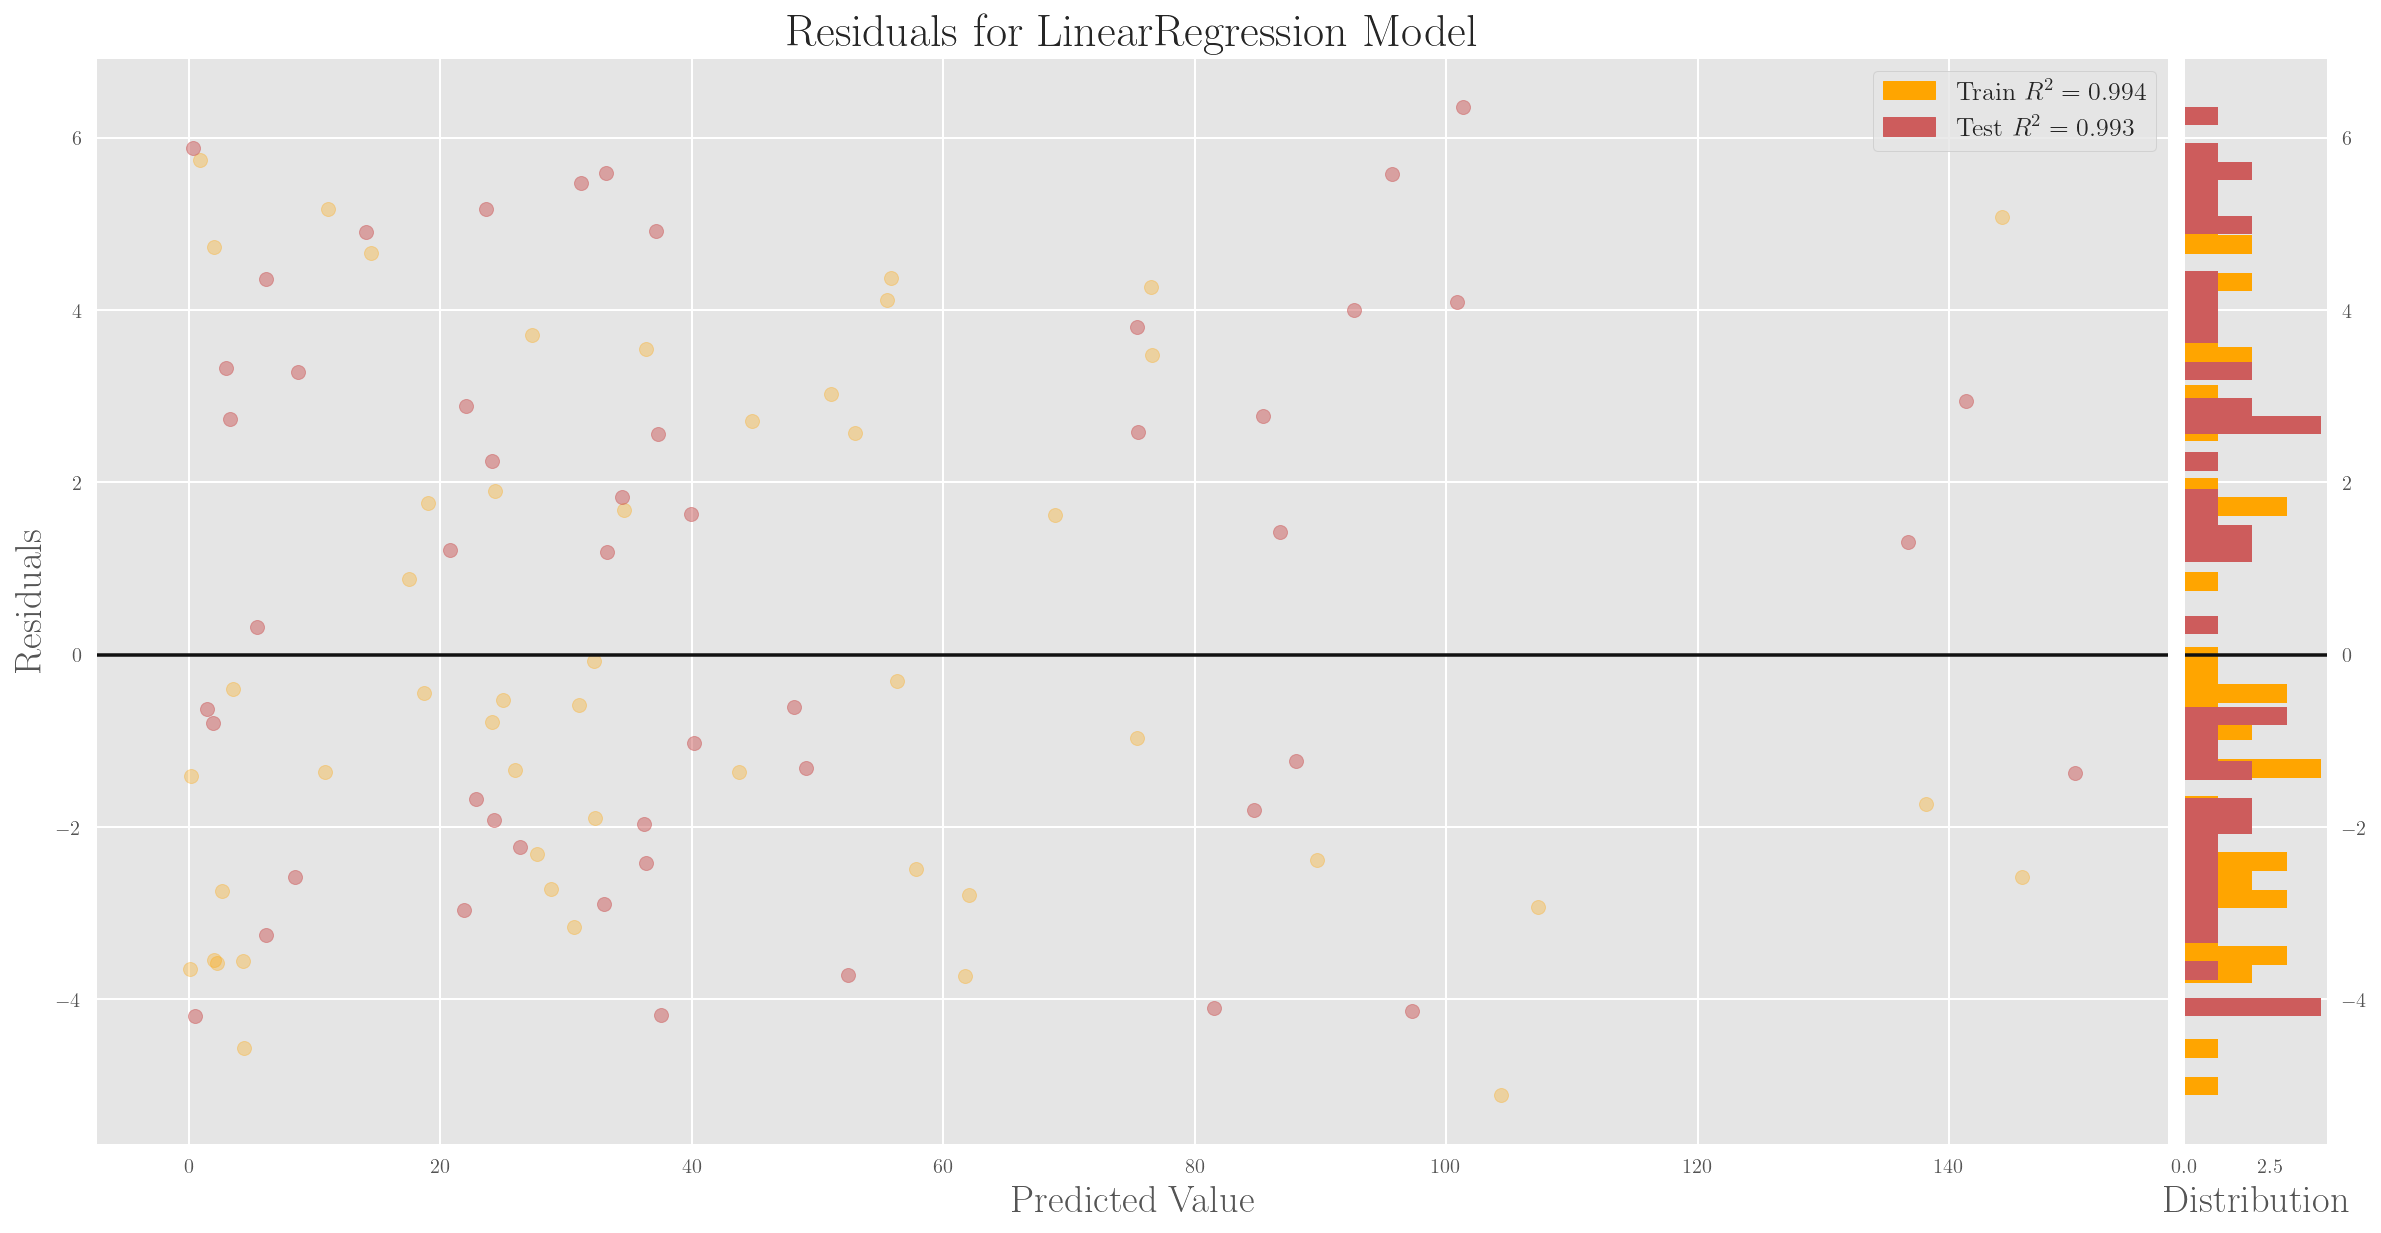

In [17]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_poly, y_train, X_poly_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

There is a homoscedasticity of the residuals, and no patterns are present in the residuals. This too is an encouraging sign.

## Visualization of the model predictions

As a final step, let us visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

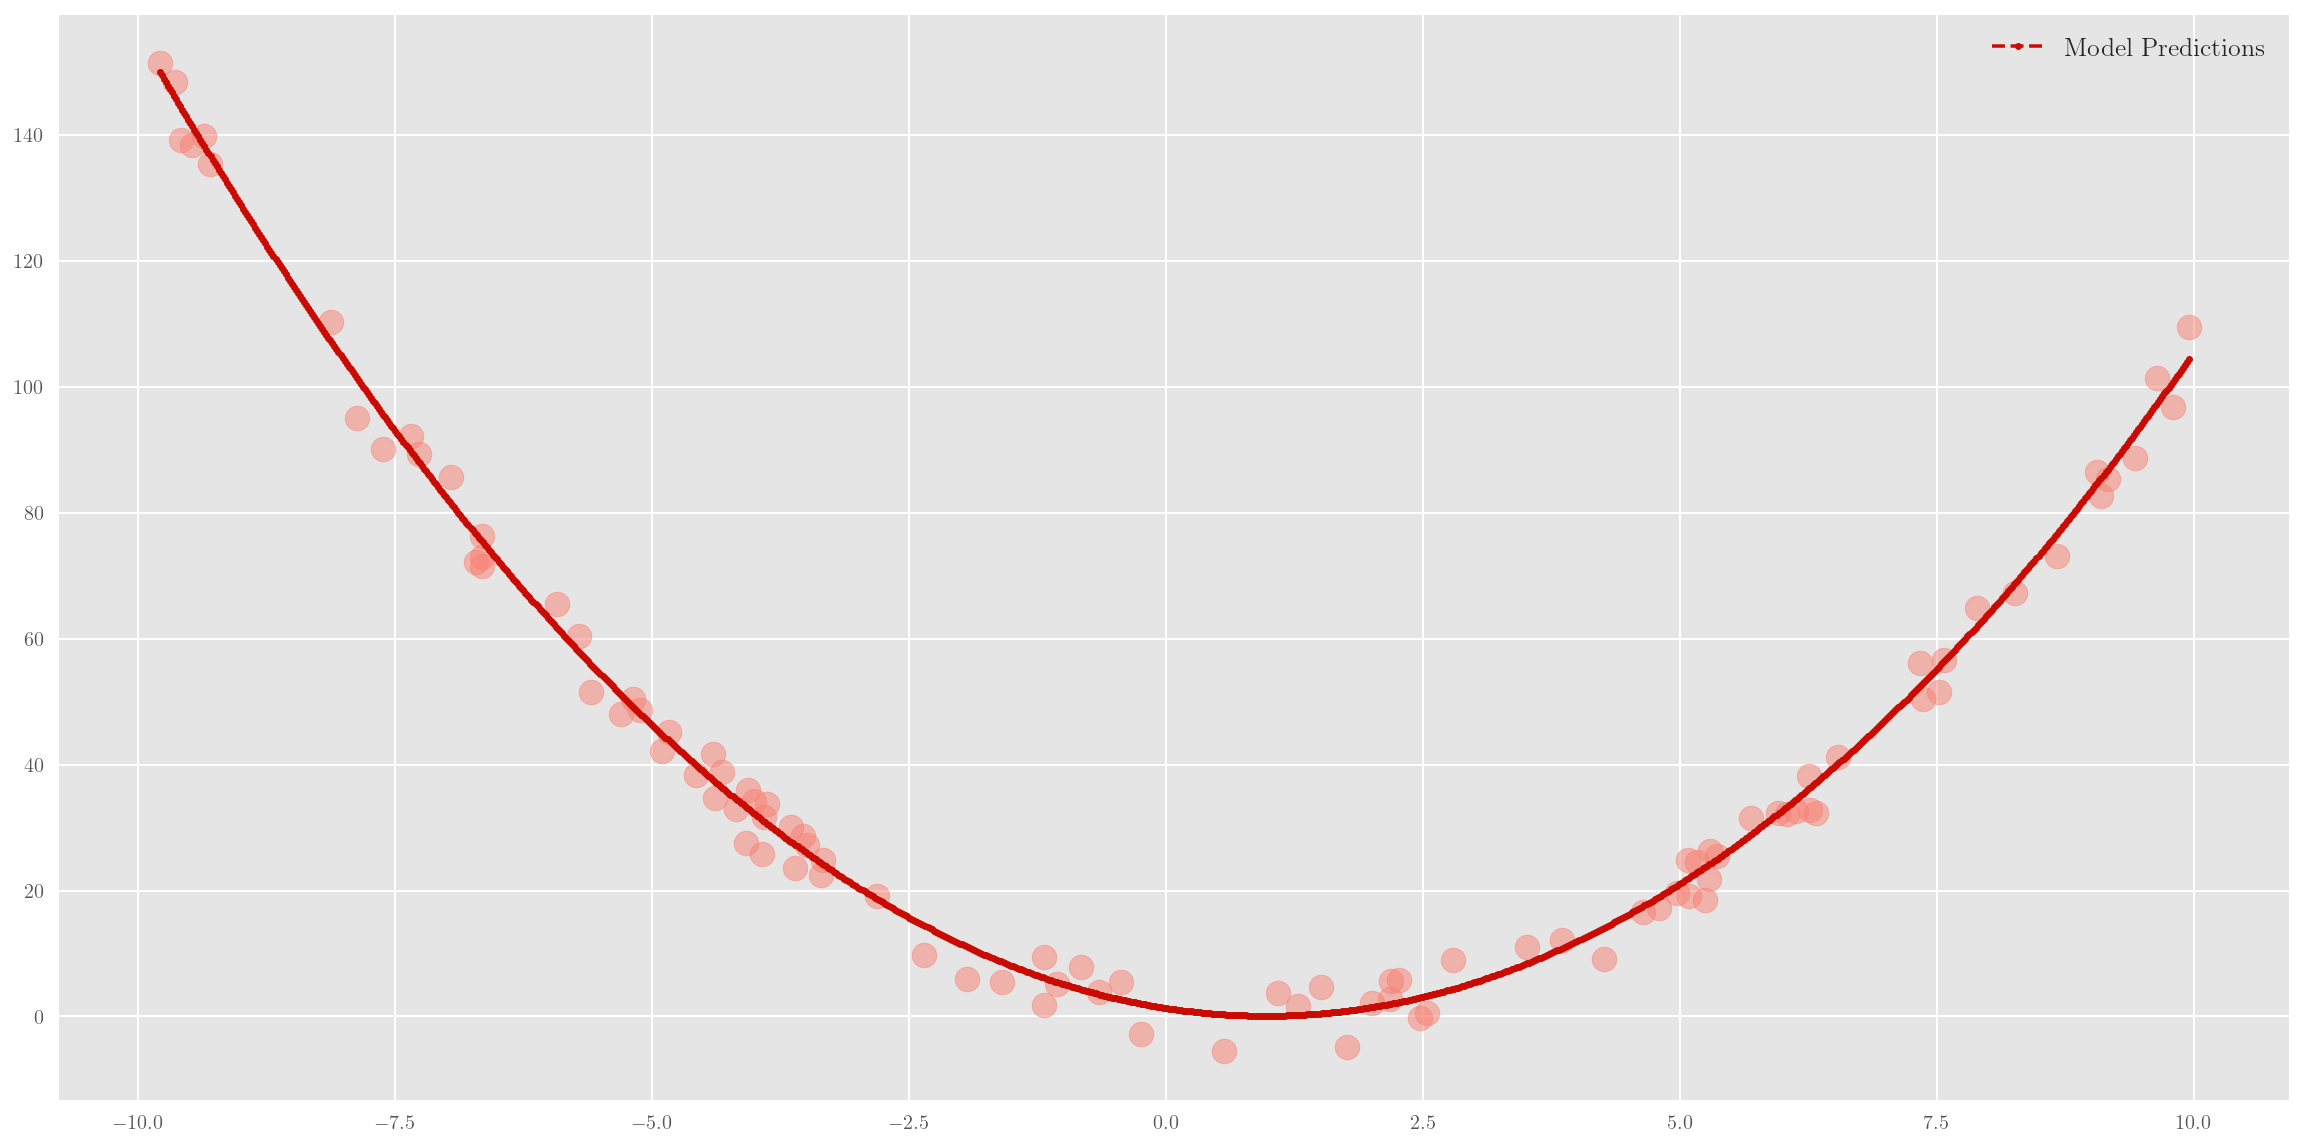

In [18]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(polynomial.transform(X))

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

A careful observation of the prediction curve shows that it has fit the data with high fidelity.

# Conclusion

For this dataset, polynomial regression has proved effective.
